In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import src.utils as utils

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#742C81", "#FFA62B", "#1A589F"]) 

data_list1 = [
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s2_v1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s2_v2")
]
data_list2 = [
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button3"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button4")
]
data_list3 = [
    f"/home/schiavazza/data/hpe/fault_button/APRIL/exp01/data",
    f"/home/schiavazza/data/hpe/fault_button/APRIL/exp02/data",
    f"/home/schiavazza/data/hpe/fault_button/APRIL/exp03/data",
]

In [2]:
thresh_multipliers = np.linspace(0.1, 1.5, 20)

In [3]:
scale = 1.0
dataset_tres = 0.01
n = 20
tmpPlotter = utils.Plotter(data_list1[0])
base_thresh = tmpPlotter.find_threshold(scale, p=1.0)
print(base_thresh)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list1:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff1 = np.zeros((n,), dtype=float)
std_diff1 = np.zeros((n,), dtype=float)

u_false1 = np.zeros((n,), dtype=float)
std_false1 = np.zeros((n,), dtype=float)

u_missed1 = np.zeros((n,), dtype=float)
std_missed1 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff1[i] = np.nanmean(tmp)
    std_diff1[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false1[i] = np.nanmean(tmp)
    std_false1[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed1[i] = np.nanmean(tmp)
    std_missed1[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log
[552, 277]
Radius in px: 186
Threshold: 14334.0, base threshold: 16.742197720052324
16.742197720052324
importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:05<00:00,  3.86it/s]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:563: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  differences_ls = np.array(differences_ls)
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:564: RuntimeWarning: Mean of empty slice
  mean_times = np.array([np.nanmean(d) for d in differences_ls])
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:05<00:00,  3.96it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:03<00:00,  5.74it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:02<00:00,  6.92it/s]
/tmp/ipykernel_1539397/3438029857.py:36: RuntimeWarning: Mean of empty slice
  u_diff1[i] = np.nanmean(tmp)


In [4]:
scale = 2.0
dataset_tres = 0.01
n = 20
tmpPlotter = utils.Plotter(data_list2[0])
base_thresh = tmpPlotter.find_threshold(scale, p=1.0)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list2:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff2 = np.zeros((n,), dtype=float)
std_diff2 = np.zeros((n,), dtype=float)

u_false2 = np.zeros((n,), dtype=float)
std_false2 = np.zeros((n,), dtype=float)

u_missed2 = np.zeros((n,), dtype=float)
std_missed2 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff2[i] = np.nanmean(tmp)
    std_diff2[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false2[i] = np.nanmean(tmp)
    std_false2[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed2[i] = np.nanmean(tmp)
    std_missed2[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log
[301, 217]
Radius in px: 418
Threshold: 29593.0, base threshold: 9.636682764167809
importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:07<00:00,  2.71it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:07<00:00,  2.64it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:10<00:00,  1.96it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


In [5]:
scale = 0.5
dataset_tres = 0.01
n = 20
tmpPlotter = utils.Plotter(data_list3[-1])
base_thresh = tmpPlotter.find_threshold(scale, p=1.0)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list3:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff3 = np.zeros((n,), dtype=float)
std_diff3 = np.zeros((n,), dtype=float)

u_false3 = np.zeros((n,), dtype=float)
std_false3 = np.zeros((n,), dtype=float)

u_missed3 = np.zeros((n,), dtype=float)
std_missed3 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff3[i] = np.nanmean(tmp)
    std_diff3[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false3[i] = np.nanmean(tmp)
    std_false3[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed3[i] = np.nanmean(tmp)
    std_missed3[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data


100%|██████████| 38970/38970 [00:11<00:00, 3377.39it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data/info.log
[589, 366]
Radius in px: 99
Threshold: 1598.0, base threshold: 6.412005457025921
importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp01/data


100%|██████████| 20781/20781 [00:06<00:00, 3423.97it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp01/data/info.log
[589, 366]
Radius in px: 99


100%|██████████| 20/20 [00:00<00:00, 185.95it/s]

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data



100%|██████████| 50892/50892 [00:15<00:00, 3264.47it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data/info.log
[589, 366]
Radius in px: 99


100%|██████████| 20/20 [00:00<00:00, 106.25it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data


100%|██████████| 38970/38970 [00:10<00:00, 3691.31it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data/info.log
[589, 366]
Radius in px: 99


100%|██████████| 20/20 [00:00<00:00, 90.53it/s]


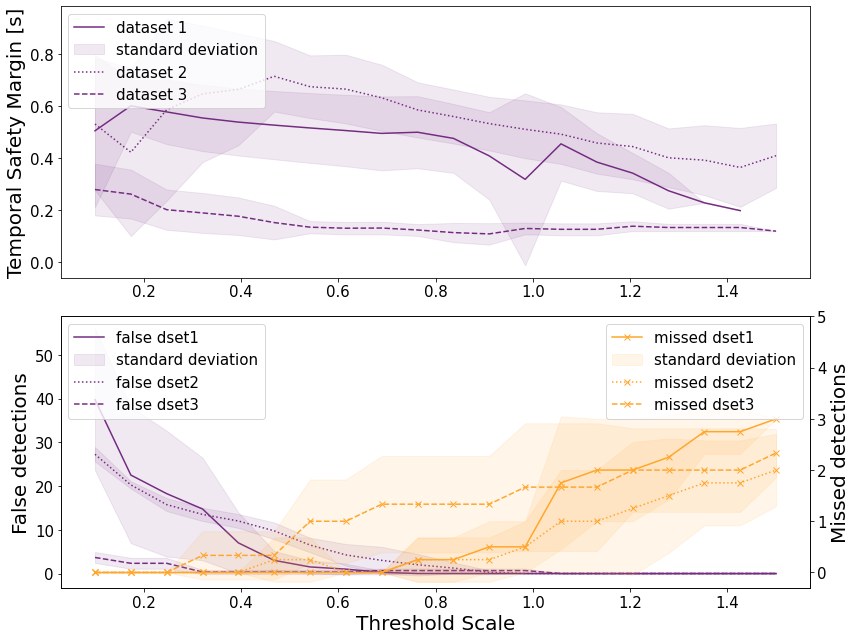

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9))

axs2 = axs[1].twinx()

u_diffs = [u_diff1, u_diff2, u_diff3]
std_diffs = [std_diff1, std_diff2, std_diff3]
u_falses = [u_false1, u_false2, u_false3]
std_falses = [std_false1, std_false2, std_false3]
u_misseds = [u_missed1, u_missed2, u_missed3]
std_misseds = [std_missed1, std_missed2, std_missed3]
style = ["solid", "dotted", "dashed"]

for i in range(3):
    u_diff = u_diffs[i]
    std_diff = std_diffs[i]
    u_false = u_falses[i]
    std_false = std_falses[i]
    u_missed = u_misseds[i]
    std_missed = std_misseds[i]

    axs[0].plot(thresh_multipliers, u_diff, color='C0', linestyle=style[i], label=f"dataset {i+1}")
    axs[0].fill_between(thresh_multipliers, u_diff-std_diff, u_diff+std_diff, alpha=0.1, color='C0', label="standard deviation")
    handles, labels = axs[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[0].legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper left")
    # axs[0].set_xticks(thresh_multipliers)

    axs[1].set_xlabel("Threshold Scale", fontsize=20)
    axs[0].set_ylabel("Temporal Safety Margin [s]", fontsize=20)

    axs[1].plot(thresh_multipliers, u_false, label=f"false dset{i+1}", linestyle=style[i], color="C0")
    axs[1].fill_between(thresh_multipliers, u_false-std_false, u_false+std_false, alpha=0.1, label=f"standard deviation", color='C0')
    axs[1].set_ylabel("False detections", fontsize=20)

    
    axs2.plot(thresh_multipliers, u_missed,marker="x", label=f"missed dset{i+1}", linestyle=style[i], color="C1")
    axs2.fill_between(thresh_multipliers, u_missed-std_missed, u_missed+std_missed, alpha=0.1, label=f"standard deviation", color="C1")
    axs2.set_ylabel("Missed detections", fontsize=20)
    axs2.set_ylim([-0.1*(3), 5])
    # ax.set_xticks(thresh_multipliers)
    # ax.set_yticks(n_detections)
    # ymax = max(max(u_false + std_false), max(u_missed + std_missed))
    # ax.set_ylim([-0.5, ymax + 0.5])
    # ax.set_xscale('log')
    # ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
    # # ax.set_ylabel("number of detections", fontsize=20)
    # ax.set_title("Detections", fontsize=22);
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[1].legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper left")
    # axs[1].legend(loc="upper left", fontsize=15)
    handles, labels = axs2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs2.legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper right")

plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/svg_final/pngs/stats_thresh.png", dpi=300)

In [7]:
u_false2

array([27.25, 20.25, 15.75, 13.5 , 12.  ,  9.75,  6.5 ,  4.25,  3.  ,
        2.  ,  1.25,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])

The effects of changing the thresholds seem to be consistent between datasets. Each scenario has a preferred threshold value that gives optimal results. Note that the ROI dimension is different for every dataset depending on the scene.

The value of the optimal threshold is different for every dataset, but each shows the same pattern in the results. Higher thresholds result in more missed detections, but fewer false detections. The ideal threshold minimizes false and missed detections. 

There isn't a single value that can be used for every scenario, but if there is a tradeoff between false and missed detections. 

In [8]:
scales = np.linspace(50.0, 500, 20)
dataset_tres = 0.01
base_thresh = 12

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list1:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff1 = np.zeros((n,), dtype=float)
std_diff1 = np.zeros((n,), dtype=float)

u_false1 = np.zeros((n,), dtype=float)
std_false1 = np.zeros((n,), dtype=float)

u_missed1 = np.zeros((n,), dtype=float)
std_missed1 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff1[i] = np.nanmean(tmp)
    std_diff1[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false1[i] = np.nanmean(tmp)
    std_false1[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed1[i] = np.nanmean(tmp)
    std_missed1[i] = np.nanstd(tmp)


scales = np.linspace(50.0, 500, 20)
dataset_tres = 0.01
base_thresh = 9

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list2:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff2 = np.zeros((n,), dtype=float)
std_diff2 = np.zeros((n,), dtype=float)

u_false2 = np.zeros((n,), dtype=float)
std_false2 = np.zeros((n,), dtype=float)

u_missed2 = np.zeros((n,), dtype=float)
std_missed2 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff2[i] = np.nanmean(tmp)
    std_diff2[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false2[i] = np.nanmean(tmp)
    std_false2[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed2[i] = np.nanmean(tmp)
    std_missed2[i] = np.nanstd(tmp)


scales = np.linspace(20.0, 500, 20)
dataset_tres = 0.01
base_thresh = 1.4

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list3:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff3 = np.zeros((n,), dtype=float)
std_diff3 = np.zeros((n,), dtype=float)

u_false3 = np.zeros((n,), dtype=float)
std_false3 = np.zeros((n,), dtype=float)

u_missed3 = np.zeros((n,), dtype=float)
std_missed3 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff3[i] = np.nanmean(tmp)
    std_diff3[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false3[i] = np.nanmean(tmp)
    std_false3[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed3[i] = np.nanmean(tmp)
    std_missed3[i] = np.nanstd(tmp)




importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log
[552, 277]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:01<00:19,  1.02s/it]

Radius in px: 73


 10%|█         | 2/20 [00:02<00:20,  1.13s/it]

Radius in px: 97


 15%|█▌        | 3/20 [00:03<00:20,  1.23s/it]

Radius in px: 121


 20%|██        | 4/20 [00:05<00:21,  1.35s/it]

Radius in px: 144


 25%|██▌       | 5/20 [00:06<00:22,  1.51s/it]

Radius in px: 168


 30%|███       | 6/20 [00:09<00:24,  1.75s/it]

Radius in px: 192


 35%|███▌      | 7/20 [00:11<00:27,  2.08s/it]

Radius in px: 215


 40%|████      | 8/20 [00:14<00:28,  2.39s/it]

Radius in px: 239


 45%|████▌     | 9/20 [00:18<00:29,  2.72s/it]

Radius in px: 263


 50%|█████     | 10/20 [00:22<00:30,  3.05s/it]

Radius in px: 286


 55%|█████▌    | 11/20 [00:26<00:29,  3.33s/it]

Radius in px: 310


 60%|██████    | 12/20 [00:30<00:29,  3.69s/it]

Radius in px: 334


 65%|██████▌   | 13/20 [00:35<00:28,  4.00s/it]

Radius in px: 357


 70%|███████   | 14/20 [00:40<00:26,  4.36s/it]

Radius in px: 381


 75%|███████▌  | 15/20 [00:45<00:22,  4.59s/it]

Radius in px: 405


 80%|████████  | 16/20 [00:50<00:18,  4.66s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:55<00:14,  4.74s/it]

Radius in px: 452


 90%|█████████ | 18/20 [01:00<00:09,  4.74s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [01:05<00:04,  4.88s/it]

Radius in px: 500


100%|██████████| 20/20 [01:09<00:00,  3.50s/it]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:520: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  differences_ls = np.array(differences_ls)
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:521: RuntimeWarning: Mean of empty slice
  mean_times = np.array([np.nanmean(d) for d in differences_ls])
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log
[552, 277]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:18,  1.01it/s]

Radius in px: 73


 10%|█         | 2/20 [00:02<00:19,  1.06s/it]

Radius in px: 97


 15%|█▌        | 3/20 [00:03<00:19,  1.16s/it]

Radius in px: 121


 20%|██        | 4/20 [00:04<00:19,  1.24s/it]

Radius in px: 144


 25%|██▌       | 5/20 [00:06<00:20,  1.38s/it]

Radius in px: 168


 30%|███       | 6/20 [00:08<00:22,  1.62s/it]

Radius in px: 192


 35%|███▌      | 7/20 [00:11<00:26,  2.01s/it]

Radius in px: 215


 40%|████      | 8/20 [00:14<00:29,  2.43s/it]

Radius in px: 239


 45%|████▌     | 9/20 [00:18<00:31,  2.86s/it]

Radius in px: 263


 50%|█████     | 10/20 [00:22<00:31,  3.13s/it]

Radius in px: 286


 55%|█████▌    | 11/20 [00:26<00:30,  3.41s/it]

Radius in px: 310


 60%|██████    | 12/20 [00:30<00:28,  3.57s/it]

Radius in px: 334


 65%|██████▌   | 13/20 [00:34<00:26,  3.75s/it]

Radius in px: 357


 70%|███████   | 14/20 [00:38<00:22,  3.80s/it]

Radius in px: 381


 75%|███████▌  | 15/20 [00:42<00:19,  3.82s/it]

Radius in px: 405


 80%|████████  | 16/20 [00:46<00:15,  3.86s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:50<00:11,  3.91s/it]

Radius in px: 452


 90%|█████████ | 18/20 [00:53<00:07,  3.91s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [00:57<00:03,  3.83s/it]

Radius in px: 500


100%|██████████| 20/20 [01:01<00:00,  3.08s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log
[552, 277]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:18,  1.04it/s]

Radius in px: 73


 10%|█         | 2/20 [00:02<00:18,  1.04s/it]

Radius in px: 97


 15%|█▌        | 3/20 [00:03<00:19,  1.14s/it]

Radius in px: 121


 20%|██        | 4/20 [00:04<00:20,  1.26s/it]

Radius in px: 144


 25%|██▌       | 5/20 [00:06<00:20,  1.39s/it]

Radius in px: 168


 30%|███       | 6/20 [00:08<00:21,  1.55s/it]

Radius in px: 192


 35%|███▌      | 7/20 [00:10<00:23,  1.77s/it]

Radius in px: 215


 40%|████      | 8/20 [00:13<00:24,  2.03s/it]

Radius in px: 239


 45%|████▌     | 9/20 [00:16<00:25,  2.34s/it]

Radius in px: 263


 50%|█████     | 10/20 [00:19<00:27,  2.75s/it]

Radius in px: 286


 55%|█████▌    | 11/20 [00:23<00:27,  3.05s/it]

Radius in px: 310


 60%|██████    | 12/20 [00:27<00:26,  3.31s/it]

Radius in px: 334


 65%|██████▌   | 13/20 [00:31<00:25,  3.61s/it]

Radius in px: 357


 70%|███████   | 14/20 [00:35<00:22,  3.71s/it]

Radius in px: 381


 75%|███████▌  | 15/20 [00:39<00:19,  3.90s/it]

Radius in px: 405


 80%|████████  | 16/20 [00:44<00:16,  4.06s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:48<00:12,  4.23s/it]

Radius in px: 452


 90%|█████████ | 18/20 [00:53<00:08,  4.40s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [00:58<00:04,  4.47s/it]

Radius in px: 500


100%|██████████| 20/20 [01:02<00:00,  3.15s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log
[552, 277]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:14,  1.30it/s]

Radius in px: 73


 10%|█         | 2/20 [00:01<00:14,  1.22it/s]

Radius in px: 97


 15%|█▌        | 3/20 [00:02<00:14,  1.15it/s]

Radius in px: 121


 20%|██        | 4/20 [00:03<00:15,  1.05it/s]

Radius in px: 144


 25%|██▌       | 5/20 [00:04<00:16,  1.10s/it]

Radius in px: 168


 30%|███       | 6/20 [00:06<00:17,  1.25s/it]

Radius in px: 192


 35%|███▌      | 7/20 [00:08<00:17,  1.36s/it]

Radius in px: 215


 40%|████      | 8/20 [00:09<00:17,  1.49s/it]

Radius in px: 239


 45%|████▌     | 9/20 [00:12<00:18,  1.69s/it]

Radius in px: 263


 50%|█████     | 10/20 [00:14<00:18,  1.86s/it]

Radius in px: 286


 55%|█████▌    | 11/20 [00:16<00:18,  2.03s/it]

Radius in px: 310


 60%|██████    | 12/20 [00:19<00:17,  2.17s/it]

Radius in px: 334


 65%|██████▌   | 13/20 [00:21<00:16,  2.34s/it]

Radius in px: 357


 70%|███████   | 14/20 [00:24<00:14,  2.46s/it]

Radius in px: 381


 75%|███████▌  | 15/20 [00:27<00:12,  2.53s/it]

Radius in px: 405


 80%|████████  | 16/20 [00:30<00:10,  2.63s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:32<00:08,  2.68s/it]

Radius in px: 452


 90%|█████████ | 18/20 [00:35<00:05,  2.69s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [00:38<00:02,  2.67s/it]

Radius in px: 500


100%|██████████| 20/20 [00:40<00:00,  2.05s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log
[301, 217]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:08,  2.17it/s]

Radius in px: 73


 10%|█         | 2/20 [00:01<00:09,  1.86it/s]

Radius in px: 97


 15%|█▌        | 3/20 [00:01<00:10,  1.57it/s]

Radius in px: 121


 20%|██        | 4/20 [00:02<00:12,  1.29it/s]

Radius in px: 144


 25%|██▌       | 5/20 [00:03<00:12,  1.21it/s]

Radius in px: 168


 30%|███       | 6/20 [00:04<00:12,  1.10it/s]

Radius in px: 192


 35%|███▌      | 7/20 [00:05<00:12,  1.07it/s]

Radius in px: 215


 40%|████      | 8/20 [00:06<00:11,  1.06it/s]

Radius in px: 239


 45%|████▌     | 9/20 [00:07<00:10,  1.02it/s]

Radius in px: 263


 50%|█████     | 10/20 [00:08<00:09,  1.03it/s]

Radius in px: 286


 55%|█████▌    | 11/20 [00:09<00:08,  1.06it/s]

Radius in px: 310


 60%|██████    | 12/20 [00:10<00:07,  1.07it/s]

Radius in px: 334


 65%|██████▌   | 13/20 [00:11<00:06,  1.09it/s]

Radius in px: 357


 70%|███████   | 14/20 [00:12<00:05,  1.10it/s]

Radius in px: 381


 75%|███████▌  | 15/20 [00:13<00:04,  1.11it/s]

Radius in px: 405


 80%|████████  | 16/20 [00:14<00:03,  1.12it/s]

Radius in px: 428


 85%|████████▌ | 17/20 [00:14<00:02,  1.13it/s]

Radius in px: 452


 90%|█████████ | 18/20 [00:15<00:01,  1.15it/s]

Radius in px: 476


 95%|█████████▌| 19/20 [00:16<00:00,  1.16it/s]

Radius in px: 500


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2/info.log
[301, 217]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:07,  2.38it/s]

Radius in px: 73


 10%|█         | 2/20 [00:00<00:09,  1.99it/s]

Radius in px: 97


 15%|█▌        | 3/20 [00:01<00:10,  1.61it/s]

Radius in px: 121


 20%|██        | 4/20 [00:02<00:11,  1.36it/s]

Radius in px: 144


 25%|██▌       | 5/20 [00:03<00:12,  1.22it/s]

Radius in px: 168


 30%|███       | 6/20 [00:04<00:12,  1.12it/s]

Radius in px: 192


 35%|███▌      | 7/20 [00:05<00:12,  1.05it/s]

Radius in px: 215


 40%|████      | 8/20 [00:06<00:11,  1.02it/s]

Radius in px: 239


 45%|████▌     | 9/20 [00:07<00:10,  1.01it/s]

Radius in px: 263


 50%|█████     | 10/20 [00:08<00:09,  1.01it/s]

Radius in px: 286


 55%|█████▌    | 11/20 [00:09<00:08,  1.02it/s]

Radius in px: 310


 60%|██████    | 12/20 [00:10<00:07,  1.03it/s]

Radius in px: 334


 65%|██████▌   | 13/20 [00:11<00:06,  1.03it/s]

Radius in px: 357


 70%|███████   | 14/20 [00:12<00:05,  1.04it/s]

Radius in px: 381


 75%|███████▌  | 15/20 [00:13<00:04,  1.02it/s]

Radius in px: 405


 80%|████████  | 16/20 [00:14<00:04,  1.05s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:16<00:03,  1.13s/it]

Radius in px: 452


 90%|█████████ | 18/20 [00:17<00:02,  1.09s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [00:18<00:01,  1.04s/it]

Radius in px: 500


100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3/info.log
[301, 217]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:13,  1.37it/s]

Radius in px: 73


 10%|█         | 2/20 [00:01<00:15,  1.15it/s]

Radius in px: 97


 15%|█▌        | 3/20 [00:02<00:16,  1.04it/s]

Radius in px: 121


 20%|██        | 4/20 [00:04<00:19,  1.20s/it]

Radius in px: 144


 25%|██▌       | 5/20 [00:05<00:19,  1.30s/it]

Radius in px: 168


 30%|███       | 6/20 [00:07<00:19,  1.36s/it]

Radius in px: 192


 35%|███▌      | 7/20 [00:08<00:18,  1.41s/it]

Radius in px: 215


 40%|████      | 8/20 [00:10<00:16,  1.41s/it]

Radius in px: 239


 45%|████▌     | 9/20 [00:11<00:15,  1.42s/it]

Radius in px: 263


 50%|█████     | 10/20 [00:13<00:14,  1.40s/it]

Radius in px: 286


 55%|█████▌    | 11/20 [00:14<00:12,  1.39s/it]

Radius in px: 310


 60%|██████    | 12/20 [00:15<00:10,  1.33s/it]

Radius in px: 334


 65%|██████▌   | 13/20 [00:16<00:09,  1.29s/it]

Radius in px: 357


 70%|███████   | 14/20 [00:17<00:07,  1.25s/it]

Radius in px: 381


 75%|███████▌  | 15/20 [00:19<00:06,  1.24s/it]

Radius in px: 405


 80%|████████  | 16/20 [00:20<00:05,  1.25s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:21<00:03,  1.24s/it]

Radius in px: 452


 90%|█████████ | 18/20 [00:22<00:02,  1.25s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [00:24<00:01,  1.23s/it]

Radius in px: 500


100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4/info.log
[301, 217]


  0%|          | 0/20 [00:00<?, ?it/s]

Radius in px: 50


  5%|▌         | 1/20 [00:00<00:12,  1.55it/s]

Radius in px: 73


 10%|█         | 2/20 [00:01<00:12,  1.41it/s]

Radius in px: 97


 15%|█▌        | 3/20 [00:02<00:15,  1.13it/s]

Radius in px: 121


 20%|██        | 4/20 [00:03<00:16,  1.05s/it]

Radius in px: 144


 25%|██▌       | 5/20 [00:05<00:18,  1.21s/it]

Radius in px: 168


 30%|███       | 6/20 [00:06<00:18,  1.32s/it]

Radius in px: 192


 35%|███▌      | 7/20 [00:08<00:18,  1.39s/it]

Radius in px: 215


 40%|████      | 8/20 [00:09<00:16,  1.40s/it]

Radius in px: 239


 45%|████▌     | 9/20 [00:11<00:14,  1.35s/it]

Radius in px: 263


 50%|█████     | 10/20 [00:12<00:13,  1.31s/it]

Radius in px: 286


 55%|█████▌    | 11/20 [00:13<00:11,  1.29s/it]

Radius in px: 310


 60%|██████    | 12/20 [00:14<00:10,  1.33s/it]

Radius in px: 334


 65%|██████▌   | 13/20 [00:16<00:09,  1.35s/it]

Radius in px: 357


 70%|███████   | 14/20 [00:17<00:08,  1.37s/it]

Radius in px: 381


 75%|███████▌  | 15/20 [00:19<00:06,  1.37s/it]

Radius in px: 405


 80%|████████  | 16/20 [00:20<00:05,  1.37s/it]

Radius in px: 428


 85%|████████▌ | 17/20 [00:21<00:04,  1.37s/it]

Radius in px: 452


 90%|█████████ | 18/20 [00:23<00:02,  1.36s/it]

Radius in px: 476


 95%|█████████▌| 19/20 [00:24<00:01,  1.37s/it]

Radius in px: 500


100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp01/data


100%|██████████| 20781/20781 [00:07<00:00, 2602.29it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp01/data/info.log
[589, 366]


 10%|█         | 2/20 [00:00<00:00, 18.85it/s]

Radius in px: 20
Radius in px: 45
Radius in px: 70
Radius in px: 95


 30%|███       | 6/20 [00:00<00:00, 14.00it/s]

Radius in px: 121
Radius in px: 146
Radius in px: 171


 40%|████      | 8/20 [00:00<00:00, 12.20it/s]

Radius in px: 196
Radius in px: 222


 50%|█████     | 10/20 [00:00<00:01,  8.76it/s]

Radius in px: 247
Radius in px: 272
Radius in px: 297


 60%|██████    | 12/20 [00:01<00:01,  6.52it/s]

Radius in px: 323


 65%|██████▌   | 13/20 [00:01<00:01,  5.79it/s]

Radius in px: 348


 70%|███████   | 14/20 [00:01<00:01,  5.42it/s]

Radius in px: 373


 75%|███████▌  | 15/20 [00:02<00:00,  5.05it/s]

Radius in px: 398


 80%|████████  | 16/20 [00:02<00:00,  4.82it/s]

Radius in px: 424


 85%|████████▌ | 17/20 [00:02<00:00,  4.73it/s]

Radius in px: 449


 90%|█████████ | 18/20 [00:02<00:00,  4.55it/s]

Radius in px: 474


 95%|█████████▌| 19/20 [00:03<00:00,  4.56it/s]

Radius in px: 500


100%|██████████| 20/20 [00:03<00:00,  6.14it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data


100%|██████████| 50892/50892 [00:19<00:00, 2598.68it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data/info.log
[589, 366]


  5%|▌         | 1/20 [00:00<00:02,  8.00it/s]

Radius in px: 20
Radius in px: 45


 15%|█▌        | 3/20 [00:00<00:01,  8.59it/s]

Radius in px: 70
Radius in px: 95


 25%|██▌       | 5/20 [00:00<00:01,  7.77it/s]

Radius in px: 121
Radius in px: 146


 35%|███▌      | 7/20 [00:00<00:01,  6.70it/s]

Radius in px: 171
Radius in px: 196


 40%|████      | 8/20 [00:01<00:02,  5.95it/s]

Radius in px: 222


 45%|████▌     | 9/20 [00:01<00:02,  5.02it/s]

Radius in px: 247


 50%|█████     | 10/20 [00:01<00:02,  3.60it/s]

Radius in px: 272


 55%|█████▌    | 11/20 [00:02<00:02,  3.03it/s]

Radius in px: 297


 60%|██████    | 12/20 [00:02<00:03,  2.58it/s]

Radius in px: 323


 65%|██████▌   | 13/20 [00:03<00:03,  2.30it/s]

Radius in px: 348


 70%|███████   | 14/20 [00:03<00:02,  2.06it/s]

Radius in px: 373


 75%|███████▌  | 15/20 [00:04<00:02,  1.93it/s]

Radius in px: 398


 80%|████████  | 16/20 [00:05<00:02,  1.88it/s]

Radius in px: 424


 85%|████████▌ | 17/20 [00:05<00:01,  1.85it/s]

Radius in px: 449


 90%|█████████ | 18/20 [00:06<00:01,  1.83it/s]

Radius in px: 474


 95%|█████████▌| 19/20 [00:06<00:00,  1.79it/s]

Radius in px: 500


100%|██████████| 20/20 [00:07<00:00,  2.70it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data


100%|██████████| 38970/38970 [00:14<00:00, 2763.96it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data/info.log
[589, 366]


  5%|▌         | 1/20 [00:00<00:01,  9.95it/s]

Radius in px: 20
Radius in px: 45


 20%|██        | 4/20 [00:00<00:01, 10.26it/s]

Radius in px: 70
Radius in px: 95
Radius in px: 121


 30%|███       | 6/20 [00:00<00:01,  9.64it/s]

Radius in px: 146
Radius in px: 171


 40%|████      | 8/20 [00:00<00:01,  8.53it/s]

Radius in px: 196
Radius in px: 222


 45%|████▌     | 9/20 [00:01<00:01,  7.24it/s]

Radius in px: 247


 50%|█████     | 10/20 [00:01<00:01,  5.52it/s]

Radius in px: 272


 55%|█████▌    | 11/20 [00:01<00:02,  4.41it/s]

Radius in px: 297


 60%|██████    | 12/20 [00:02<00:02,  3.93it/s]

Radius in px: 323


 65%|██████▌   | 13/20 [00:02<00:02,  3.37it/s]

Radius in px: 348


 70%|███████   | 14/20 [00:02<00:01,  3.13it/s]

Radius in px: 373


 75%|███████▌  | 15/20 [00:03<00:01,  3.01it/s]

Radius in px: 398


 80%|████████  | 16/20 [00:03<00:01,  2.96it/s]

Radius in px: 424


 85%|████████▌ | 17/20 [00:03<00:01,  2.89it/s]

Radius in px: 449


 90%|█████████ | 18/20 [00:04<00:00,  2.92it/s]

Radius in px: 474


 95%|█████████▌| 19/20 [00:04<00:00,  2.98it/s]

Radius in px: 500


100%|██████████| 20/20 [00:04<00:00,  4.10it/s]


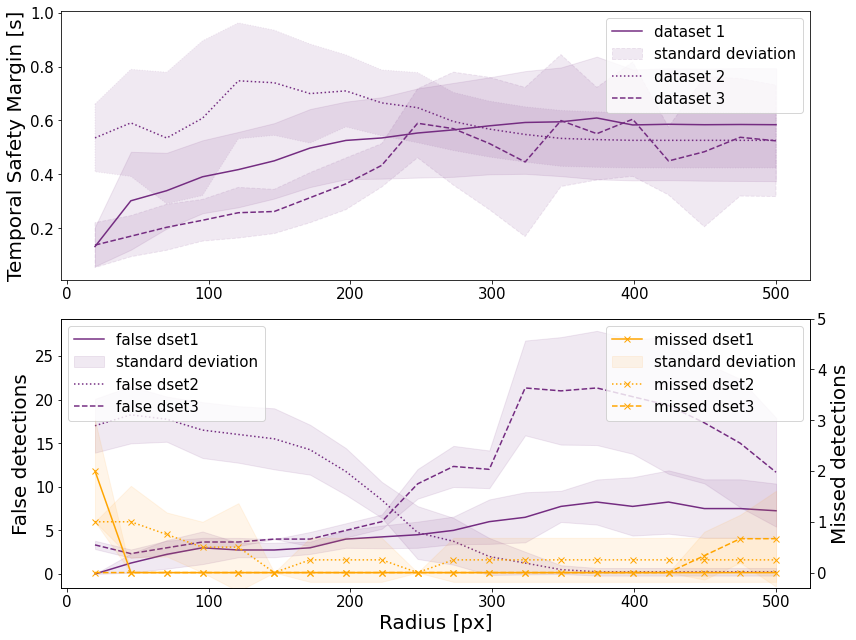

In [9]:

fig, axs = plt.subplots(2, 1, figsize=(12, 9))

axs2 = axs[1].twinx()

u_diffs = [u_diff1, u_diff2, u_diff3]
std_diffs = [std_diff1, std_diff2, std_diff3]
u_falses = [u_false1, u_false2, u_false3]
std_falses = [std_false1, std_false2, std_false3]
u_misseds = [u_missed1, u_missed2, u_missed3]
std_misseds = [std_missed1, std_missed2, std_missed3]
style = ["solid", "dotted", "dashed"]

for i in range(3):
    u_diff = u_diffs[i]
    std_diff = std_diffs[i]
    u_false = u_falses[i]
    std_false = std_falses[i]
    u_missed = u_misseds[i]
    std_missed = std_misseds[i]

    axs[0].plot(scales, u_diff, label=f"dataset {i+1}", color="C0", linestyle=style[i])
    axs[0].fill_between(scales, u_diff-std_diff, u_diff+std_diff, alpha=0.1, color='C0', linestyle=style[i], label="standard deviation")
    # axs[0].set_xticks(scales)

    axs[1].set_xlabel("Radius [px]", fontsize=20)
    axs[0].set_ylabel("Temporal Safety Margin [s]", fontsize=20)
    
    handles, labels = axs[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[0].legend(by_label.values(), by_label.keys(), fontsize=15)

    axs[1].plot(scales, u_false, label=f"false dset{i+1}", color="C0", linestyle=style[i])
    axs[1].fill_between(scales, u_false-std_false, u_false+std_false, alpha=0.1, label=f"standard deviation", color="C0")
    axs[1].set_ylabel("False detections", fontsize=20)

    
    axs2.plot(scales, u_missed, marker='x', label=f"missed dset{i+1}", linestyle=style[i], color="orange")
    axs2.fill_between(scales, u_missed-std_missed, u_missed+std_missed, alpha=0.1, label=f"standard deviation", color="C1")
    axs2.set_ylabel("Missed detections", fontsize=20)
    axs2.set_ylim([-0.1*(3), 5])
    # ax.set_xticks(scales)
    # ax.set_yticks(n_detections)
    # ymax = max(max(u_false + std_false), max(u_missed + std_missed))
    # ax.set_ylim([-0.5, ymax + 0.5])
    # ax.set_xscale('log')
    # ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
    # # ax.set_ylabel("number of detections", fontsize=20)
    # ax.set_title("Detections", fontsize=22);
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[1].legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper left")
    # axs[1].legend(loc="upper left", fontsize=15)
    handles, labels = axs2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs2.legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper right")
    # axs2.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/svg_final/pngs/stats_scale.png")

The region size influences how early we can detect the intention to press the button. A larger region allows the detection of fast movements earlier, but it may introduce a larger number of false detections.

The false and missed detection graph for the second dataset looks very different when compared to the other datasets. 
More specifically, in the other datasets the number of false detection decreases with the dimension of the roi considered. Smaller rois give better results in the other two datasets. 

In the second dataset, larger rois seem to perform better compared to smaller ones. The threshold has been adjusted for each dataset. The different results are likely caused by the different scenes. 

In the other two datasets, the image area where the button is located does not overlap with the working area of the person. In this dataset, the operator might move and do significant work in the space behind the button. When the detection area is kept small this causes more frequent false detections. Having a bigger detection area increases the robustness in these cases. On the other hand, fast movements in an area relatively more distant from the button might also trigger false detections.

In [16]:
scale = 1.0
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 12
n = 20

# tmpPlotter = utils.Plotter(data_list1[0])
# base_thresh = tmpPlotter.find_threshold(scale)
# base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list1:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff1 = np.zeros((n,), dtype=float)
std_diff1 = np.zeros((n,), dtype=float)

u_false1 = np.zeros((n,), dtype=float)
std_false1 = np.zeros((n,), dtype=float)

u_missed1 = np.zeros((n,), dtype=float)
std_missed1 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff1[i] = np.nanmean(tmp)
    std_diff1[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false1[i] = np.nanmean(tmp)
    std_false1[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed1[i] = np.nanmean(tmp)
    std_missed1[i] = np.nanstd(tmp)

scale = 2.0
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 9
# tmpPlotter = utils.Plotter(data_list2[0])
# base_thresh = tmpPlotter.find_threshold(scale)
# base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list2:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff2 = np.zeros((n,), dtype=float)
std_diff2 = np.zeros((n,), dtype=float)

u_false2 = np.zeros((n,), dtype=float)
std_false2 = np.zeros((n,), dtype=float)

u_missed2 = np.zeros((n,), dtype=float)
std_missed2 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff2[i] = np.nanmean(tmp)
    std_diff2[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false2[i] = np.nanmean(tmp)
    std_false2[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed2[i] = np.nanmean(tmp)
    std_missed2[i] = np.nanstd(tmp)


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:476: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:07<00:00,  2.85it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:05<00:00,  4.00it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log
[552, 277]
Radius in px: 186


100%|██████████| 20/20 [00:03<00:00,  5.46it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:09<00:00,  2.20it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4/info.log
[301, 217]
Radius in px: 418


100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


In [17]:

scale = 0.5
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 1.4

# tmpPlotter = utils.Plotter(data_list2[0])
# base_thresh = tmpPlotter.find_threshold(scale)

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list3:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff3 = np.zeros((n,), dtype=float)
std_diff3 = np.zeros((n,), dtype=float)

u_false3 = np.zeros((n,), dtype=float)
std_false3 = np.zeros((n,), dtype=float)

u_missed3 = np.zeros((n,), dtype=float)
std_missed3 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff3[i] = np.nanmean(tmp)
    std_diff3[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false3[i] = np.nanmean(tmp)
    std_false3[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed3[i] = np.nanmean(tmp)
    std_missed3[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp01/data


  0%|          | 0/20781 [00:00<?, ?it/s]

100%|██████████| 20781/20781 [00:05<00:00, 3480.96it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp01/data/info.log
[589, 366]
Radius in px: 99


100%|██████████| 20/20 [00:00<00:00, 35.13it/s] 


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data


100%|██████████| 50892/50892 [00:14<00:00, 3449.14it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data/info.log
[589, 366]
Radius in px: 99


100%|██████████| 20/20 [00:00<00:00, 28.88it/s] 


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data


100%|██████████| 38970/38970 [00:10<00:00, 3661.65it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data/info.log
[589, 366]
Radius in px: 99


100%|██████████| 20/20 [00:00<00:00, 24.52it/s] 


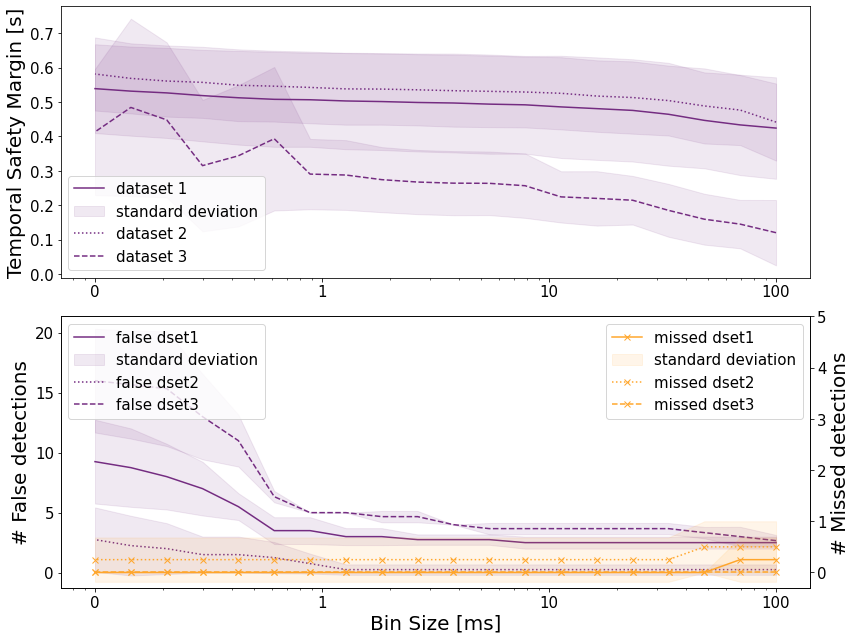

In [45]:
import matplotlib.ticker as mticker

fig, axs = plt.subplots(2, 1, figsize=(12, 9))

dataset_tres_ls = [10**(-x) * 1e3 for x in np.linspace(1, 4, 20)]

axs2 = axs[1].twinx()

u_diffs = [u_diff1, u_diff2, u_diff3]
std_diffs = [std_diff1, std_diff2, std_diff3]
u_falses = [u_false1, u_false2, u_false3]
std_falses = [std_false1, std_false2, std_false3]
u_misseds = [u_missed1, u_missed2, u_missed3]
std_misseds = [std_missed1, std_missed2, std_missed3]
style = ["solid", "dotted", "dashed"]

for i in range(3):
    u_diff = u_diffs[i]
    std_diff = std_diffs[i]
    u_false = u_falses[i]
    std_false = std_falses[i]
    u_missed = u_misseds[i]
    std_missed = std_misseds[i]
    # dataset_tres_ls = np.array(dataset_tres_ls) * 1e3
    axs[0].plot(dataset_tres_ls, u_diff, color='C0', linestyle=style[i], label=f"dataset {i+1}")
    axs[0].fill_between(dataset_tres_ls, u_diff-std_diff, u_diff+std_diff, alpha=0.1, color='C0', label="standard deviation")

    axs[1].set_xlabel("Bin Size [ms]", fontsize=20)
    axs[0].set_ylabel("Temporal Safety Margin [s]", fontsize=20)
    axs[0].set_xscale('log')
    # axs[0].set_xticks(dataset_tres_ls)
    axs[0].get_xaxis().set_major_formatter(mticker.ScalarFormatter())
    # axs[0].ticklabel_format(useOffset=False, style='plain')


    handles, labels = axs[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[0].legend(by_label.values(), by_label.keys(), fontsize=15)

    axs[1].plot(dataset_tres_ls, u_false, label=f"false dset{i+1}", linestyle=style[i], color="C0")
    axs[1].fill_between(dataset_tres_ls, u_false-std_false, u_false+std_false, alpha=0.1, label=f"standard deviation", color='C0')
    axs[1].set_ylabel("# False detections", fontsize=20)
    axs[1].set_xscale('log')
    axs[1].get_xaxis().set_major_formatter(mticker.ScalarFormatter())

    
    axs2.plot(dataset_tres_ls, u_missed,marker="x", label=f"missed dset{i+1}", linestyle=style[i], color="C1")
    axs2.fill_between(dataset_tres_ls, u_missed-std_missed, u_missed+std_missed, alpha=0.1, label=f"standard deviation", color="C1")
    axs2.set_ylabel("# Missed detections", fontsize=20)
    axs2.set_ylim([-0.1*(3), 5])
    
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[1].legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper left")
    # axs[1].legend(loc="upper left", fontsize=15)
    handles, labels = axs2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs2.legend(by_label.values(), by_label.keys(), fontsize=15, loc="upper right")
    # axs2.legend(loc="upper right", fontsize=15)

plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/svg_final/pngs/stats_tres.png")

For each dataset, we manually selected the region size $r$ and the detection threshold $T$. We vary the temporal period $k$ to observe the effects on the detection. 

For all the datasets the time difference measured decreases for longer temporal periods. The difference in absolute values across the datasets is caused by different region sizes to fit each dataset.

On the other hand, smaller time periods cause the measurement to be more noisy. For all datasets, the number of false detections increases for smaller temporal periods due to noisy spikes in the event rate.

In [3]:
# %prun plotter = utils.Plotter('/home/schiavazza/data/hpe/fault_button/s1_v1')
plotter = utils.Plotter(data_list1[0])

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log
[552, 277]


In [4]:
print(plotter.press_timing[:, 0] + 77.43874800000003)

[ 88.853898 123.339596 139.084225]


Radius in px: 186
Threshold: 10033.8, base threshold: 11.719538404036628
Radius in px: 186
Roi area: 85616px / 307200, ratio: 0.27869791666666666


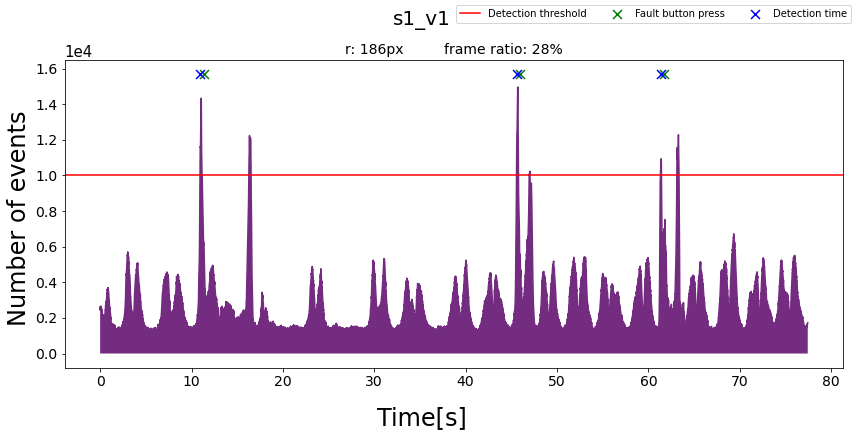

In [5]:
# fig, axs = plt.subplots(1, 2, figsize=(18, 9))

base_thresh = plotter.find_threshold(scale=1.0, p=0.7)
plotter.plot_hist(base_thresh, scale=1.0, dataset_tres=0.01, sequence_name="s1_v1")

ax = plt.gca()

Radius in px: 186
Threshold: 10033.8, base threshold: 11.719538404036628
Radius in px: 186
Roi area: 85616px / 307200, ratio: 0.27869791666666666


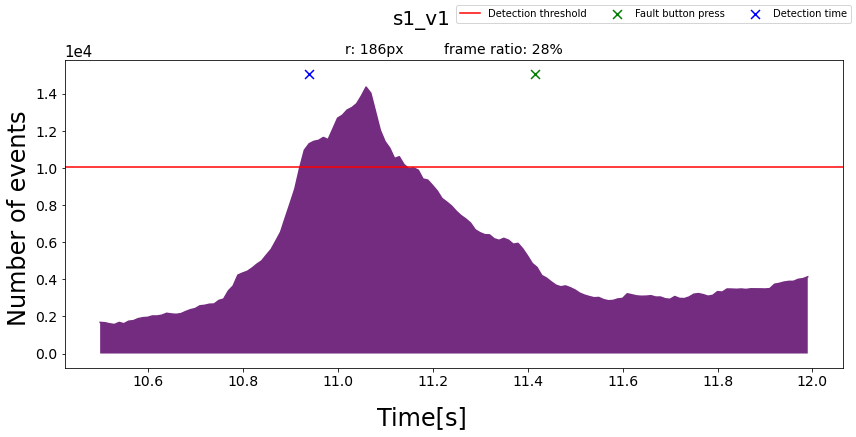

In [6]:
# fig, axs = plt.subplots(1, 2, figsize=(18, 9))

base_thresh = plotter.find_threshold(scale=1.0, p=0.7)
plotter.plot_hist(base_thresh, scale=1.0, dataset_tres=0.01, sequence_name="s1_v1", t_start=10.5, t_end=12)

ax2 = plt.gca()

Radius in px: 186
Roi area: 85616px / 307200, ratio: 0.27869791666666666
Radius in px: 186
Roi area: 85616px / 307200, ratio: 0.27869791666666666


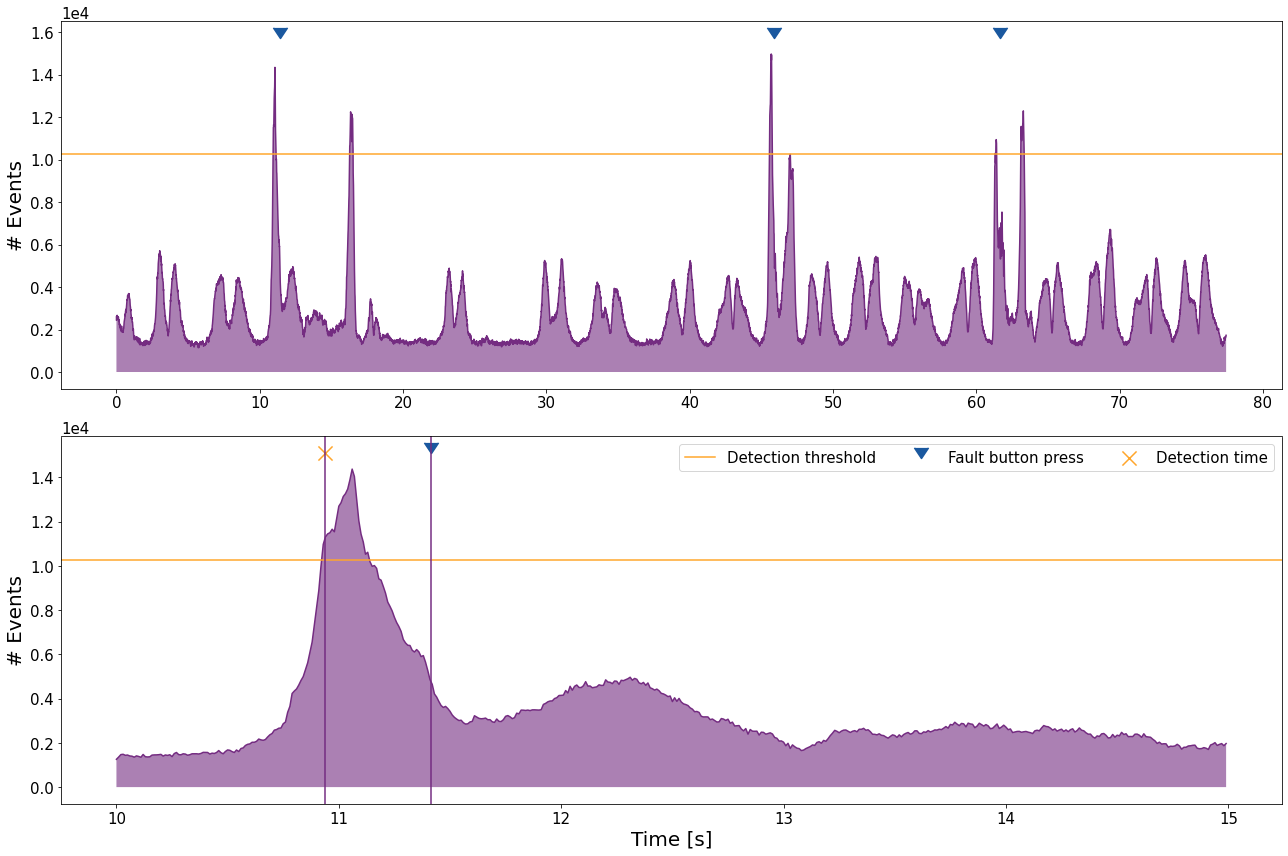

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(18, 12))

# base_thresh = plotter.find_threshold(scale=1.0, p=0.7)
base_thresh = 8.184321848907821
base_thresh = 12
plotter.plot_hist_ax(axs[0], base_thresh, scale=1.0, dataset_tres=0.01, sequence_name="s1_v1", show_presses=True, show_detections=False)

plotter.plot_hist_ax(axs[1], base_thresh, scale=1.0, dataset_tres=0.01, sequence_name="s1_v1", t_start=10, t_end=15, vline=True)

axs[1].set_xlabel("Time [s]", fontsize=20)

lines, labels = fig.axes[1].get_legend_handles_labels()
plt.legend(lines,labels, ncol=3, fontsize=15)

axs[0].set_ylabel("# Events", fontsize=20)
axs[1].set_ylabel("# Events", fontsize=20)

plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/svg_final/pngs/histogram.png")
